## pair0053: 
Environmental data



In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest
    

In [51]:
# Load dataset
df = pd.read_csv('datasets/pair0053.txt', delimiter=' ', header=None, names=['Ozone_Concen', 'Wind_Speed', 'Global_Radiation', 'Temperature'])
    

In [52]:
# Display few rows of the dataset
print(df.head())

   Ozone_Concen  Wind_Speed  Global_Radiation  Temperature
0         109.7       124.8             127.4        116.0
1         109.9        98.8              79.6         80.5
2         106.9        94.7              86.8         91.9
3          97.4       124.0             104.6        111.6
4          76.6       120.9              76.0         94.8


In [53]:
df.shape

(989, 4)

In [54]:
# Concatenate all y-values (y1, y2, y3) into a single DataFrame 

y_values = pd.concat([df['Wind_Speed'], df['Global_Radiation'], df['Temperature']], axis=0).reset_index(drop=True)

x_values = pd.concat([df['Ozone_Concen']]* 3, axis=0).reset_index(drop=True)

print(len(x_values), len(y_values))

2967 2967


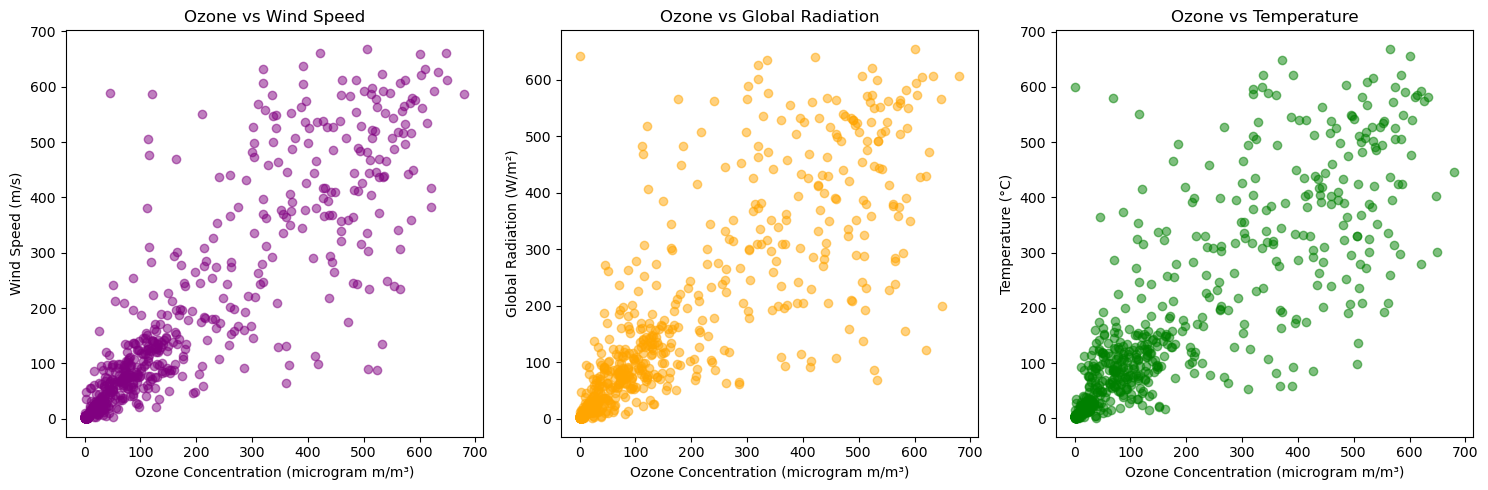

In [55]:
# Create a figure for subplots
plt.figure(figsize=(15, 5))

# Scatter plot for Wind Speed
plt.subplot(1, 3, 1)
plt.scatter(df['Ozone_Concen'], df['Wind_Speed'], alpha=0.5, color='purple')
plt.xlabel('Ozone Concentration (microgram m/m³)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Ozone vs Wind Speed')

# Scatter plot for Global Radiation
plt.subplot(1, 3, 2)
plt.scatter(df['Ozone_Concen'], df['Global_Radiation'], alpha=0.5, color='orange')
plt.xlabel('Ozone Concentration (microgram m/m³)')
plt.ylabel('Global Radiation (W/m²)')
plt.title('Ozone vs Global Radiation')

# Scatter plot for Temperature
plt.subplot(1, 3, 3)
plt.scatter(df['Ozone_Concen'], df['Temperature'], alpha=0.5, color='green')
plt.xlabel('Ozone Concentration (microgram m/m³)')
plt.ylabel('Temperature (°C)')
plt.title('Ozone vs Temperature')

plt.tight_layout()
plt.show()


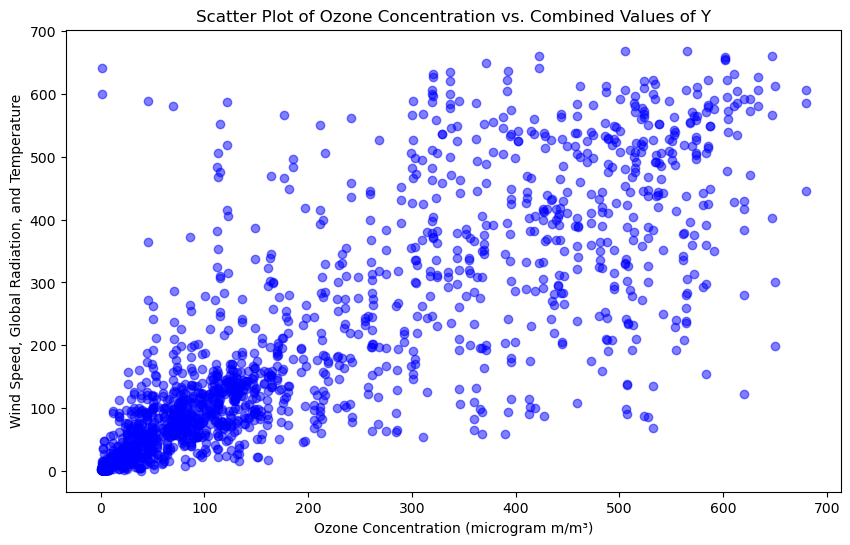

In [56]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5, color='blue')
plt.xlabel('Ozone Concentration (microgram m/m³)')
plt.ylabel('Wind Speed, Global Radiation, and Temperature')
plt.title('Scatter Plot of Ozone Concentration vs. Combined Values of Y')
plt.show()

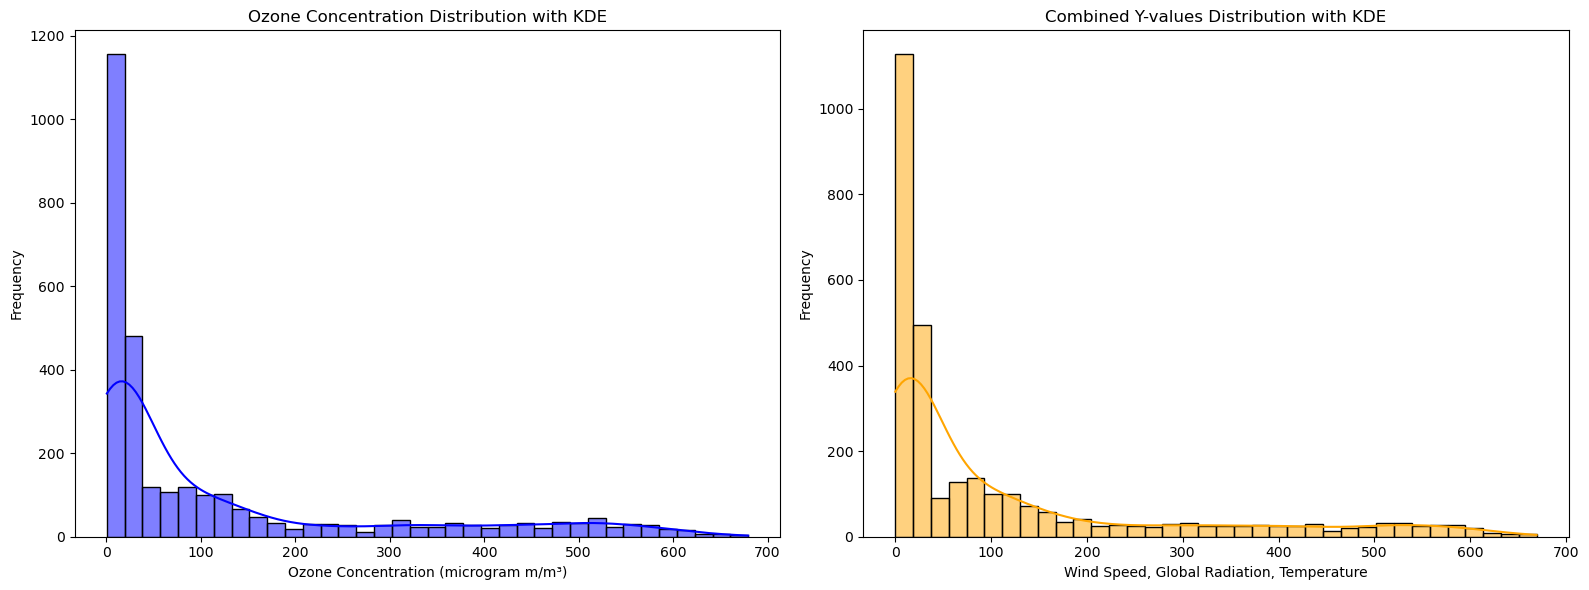

In [57]:
# Create the figure for distributions
fig, axis = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Ozone Concentration
sns.histplot(x_values, kde=True, ax=axis[0], color='blue')
axis[0].set_xlabel('Ozone Concentration (microgram m/m³)')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Ozone Concentration Distribution with KDE')

# Plot for Combined Y-values
sns.histplot(y_values, kde=True, ax=axis[1], color='orange')
axis[1].set_xlabel('Wind Speed, Global Radiation, Temperature')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Combined Y-values Distribution with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()

In [58]:
# Dip-Test for x and y
dip_test, p_val = diptest(x_values)
print(f"Dip-Test (X → Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(y_values)
print(f"Dip-Test (Y → X): {dip_test}, p-value: {p_val}")
    

Dip-Test (X → Y): 0.019099729127425077, p-value: 0.0
Dip-Test (Y → X): 0.020328759584597237, p-value: 0.0


### Findings:
- The ground truth relationship is Y → X
- The dip test results suggest that the distribution of X → Y and Y → X is likely **multimodal**,  supported by a low p-value 0.